In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [26]:
#Veriyi okuyalım
train_df = pd.read_csv("train.csv",index_col='YolcuID') 

In [27]:
train_df.head()

,Kurtulan,Bsinifi,Ad,Cinsiyet,Yas,Yakinlik,Parch,Bilet,Ucret,Kabin,Ayrildigi_Liman
YolcuID,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train_df.describe(include='all')

,Kurtulan,Bsinifi,Ad,Cinsiyet,Yas,Yakinlik,Parch,Bilet,Ucret,Kabin,Ayrildigi_Liman
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Anderson, Mr. Harry",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Kurtulan           891 non-null int64
Bsinifi            891 non-null int64
Ad                 891 non-null object
Cinsiyet           891 non-null object
Yas                714 non-null float64
Yakinlik           891 non-null int64
Parch              891 non-null int64
Bilet              891 non-null object
Ucret              891 non-null float64
Kabin              204 non-null object
Ayrildigi_Liman    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
#Cabini cıkaralım
train_df = train_df.drop('Kabin', axis=1).dropna()

In [31]:
train_df.shape

(712, 10)

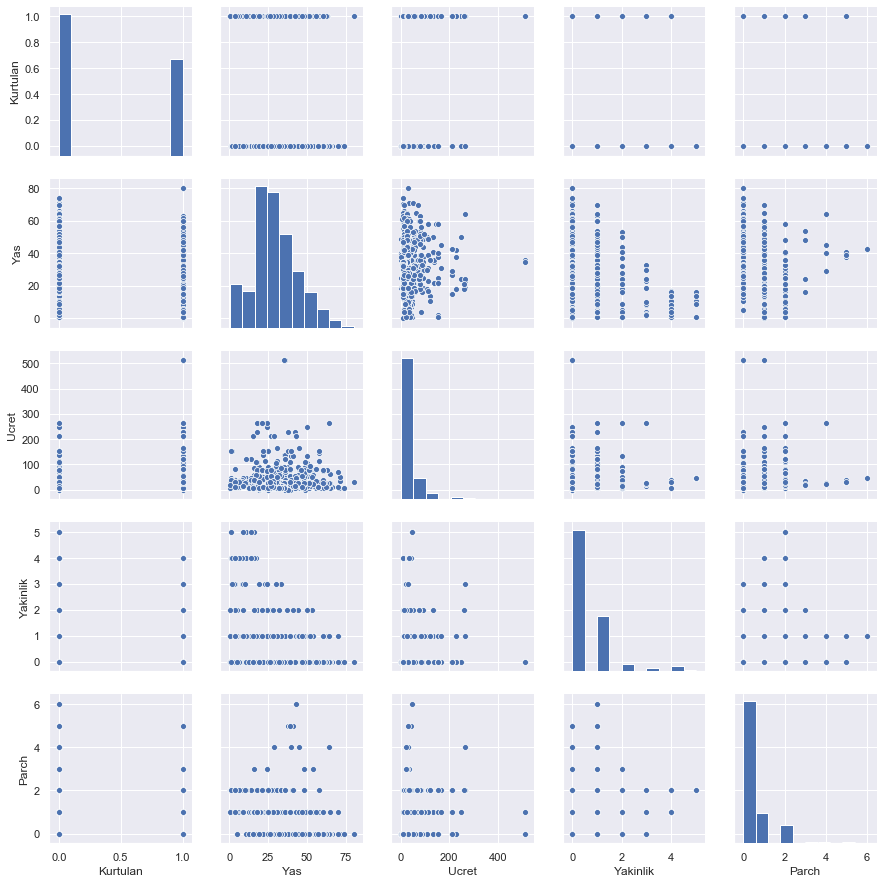

In [32]:
# Kurtulan, Yas, Ucret, Yakinlik, Parch arasında bir ilişki olup olmadığını anlamak için
# bu 5 depğişken için 5 e 5 bir grafikler demeti hazırlatıyorum. Seaborn kütüphanesinden yararlanıyoruz.
# ( Pandas tan yığın veya Seaborn den pairplot)

sns.pairplot(train_df[['Kurtulan', 'Yas', 'Ucret', 'Yakinlik', 'Parch']]);

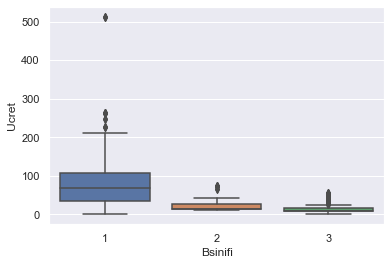

In [33]:
# Bilet ücretinin bilet sınıfı ilişkisini görelim.
sns.boxplot(x='Bsinifi', y='Ucret', data=train_df);

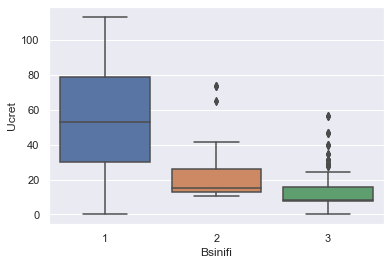

In [34]:
# Bilet ücretinin  %95 ni temizleyelim. grafiği daha anlaşılır yapmak için
veri=train_df[  train_df['Ucret'] < train_df['Ucret'].quantile(.95)     ]
sns.boxplot(x='Bsinifi', y='Ucret', data=veri);

In [35]:
# Yolcuların cinsiyetinin kurtulma yüzdesi arasındaki ilişki.
pd.crosstab(train_df['Cinsiyet'], train_df['Kurtulan'])

Kurtulan,0,1
Cinsiyet,,
female,64,195
male,360,93


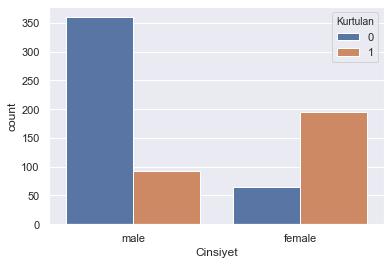

In [36]:
sns.countplot(x="Cinsiyet", hue="Kurtulan", data=train_df);

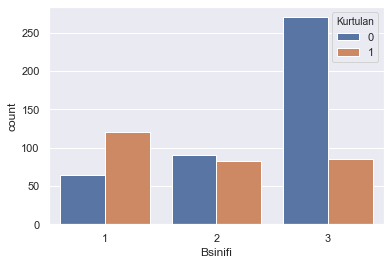

In [37]:
# Bilet sınıfı ile kurtulanlar arasında ilişkiye bakalım (Pclass vs Survived) 
sns.countplot(x="Bsinifi", hue="Kurtulan", data=train_df);

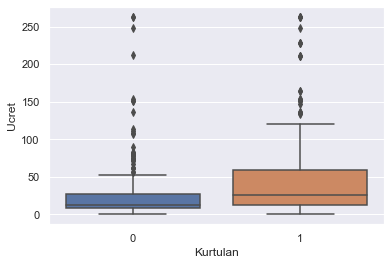

In [38]:
# kurtulan ile kurtulmayan arasında bilet fiyatlarının dağılımını inceleyelim.
#Seaborn.boxplot ile görelim. 
#acı gerçek , kurtulanlar biletleri için daha çok ödeyenler

sns.boxplot(x='Kurtulan', y='Ucret', data=train_df[train_df['Ucret'] < 500]);

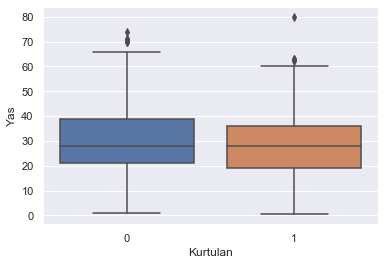

In [39]:
# Kurtulanların yaşları ile bağlantısı nedir. Grafiksel olarak doğrulayalım. 
# 30 yaşın altındakiler 55 yaşından yaşlılardan daha sık kurtulanlar arasındadır.
sns.boxplot(x='Kurtulan', y='Yas', data=train_df);

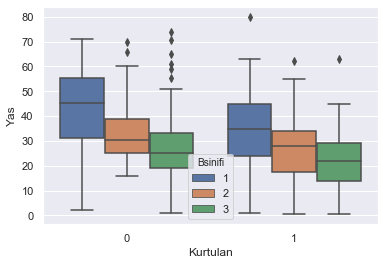

In [40]:
# Biz daha detaylı sınıflara ayırabiliriz.
sns.boxplot(x='Kurtulan', hue='Bsinifi', y='Yas', data=train_df);

In [41]:
#Burada duralım Hmm.. Bir sonuca ulaşmak zor. Başka bir yol deneyelim.
train_df['Yas_Araligi'] = train_df['Yas'].apply(lambda age: 1 if age < 30 else 3 if age > 55 else 2);

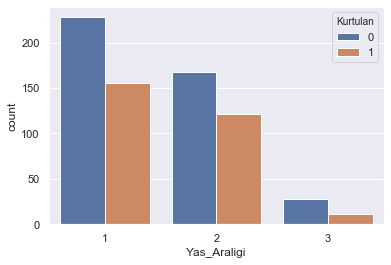

In [42]:
sns.countplot(x='Yas_Araligi', hue='Kurtulan', data=train_df);